In [1]:
import os
import pandas as pd
import numpy as np
from scipy.ndimage.interpolation import map_coordinates 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
TARGET=r'E:\ML_projects\myoband\with_CLEANED_2\FULL_CLEANED2'

In [3]:
def interpolating(data,n_rows): #output of read_csv
    #new_data is a dataframe
    n_columns=len(list(data))
    A = np.array(data) 
    new_dims = [] 
    for original_length, new_length in zip(A.shape, (n_rows,n_columns)): 
        new_dims.append(np.linspace(0, original_length-1, new_length)) 
    coords = np.meshgrid(*new_dims, indexing='ij') 
    B = map_coordinates(A, coords)
    data=pd.DataFrame(B)
    return data

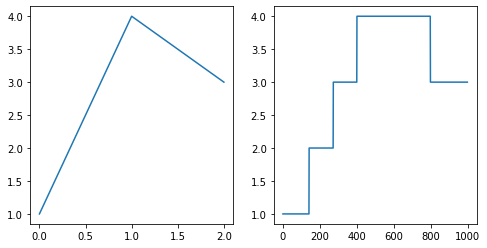

In [21]:
a=pd.DataFrame([[1,2,3,4],[4,3,4,2],[3,3,3,3]])
fig=plt.figure(figsize=(8,4))
fig.add_subplot(122)
plt.plot(interpolating(a,1000)[0])
fig.add_subplot(121)
plt.plot(a[0])
plt.show()

In [15]:
sequences=[]
labels=[]
for_dict=[]
for gesture_folder in os.listdir(TARGET):
    if gesture_folder[0]!='.':
        new_tar_1=TARGET+'\\'+gesture_folder+'\\split\\1'
        new_tar_2=TARGET+'\\'+gesture_folder+'\\split\\2'
        sample_df=pd.DataFrame()
        for csv_file in os.listdir(new_tar_1):
            if csv_file[-3:]=='csv':
                csv_dir=new_tar_1+'\\'+csv_file
                f = open(csv_dir,'rb')
                if b',' in f.readline():
                    data = pd.read_csv(csv_dir)
                else:
                    data = pd.read_csv(csv_dir,encoding = 'utf-16',delimiter = '\t')
                data = data.drop('Timestamp',axis = 1)
                data=interpolating(data,100)
                sample_df=pd.concat([sample_df,data],axis=1)
        #print(sample_df.head(2),'\n\n')
        sequences.append(np.array(sample_df))
        labels.append(gesture_folder[0:3])
        if gesture_folder[0:3] not in for_dict:
            for_dict.append(gesture_folder[0:3])
sequences=np.array(sequences)
labels=np.array(labels)

label_dict=dict(zip(for_dict, range(len(for_dict))))
inv_label_dict=dict(zip( range(len(for_dict)),for_dict))
labels=[label_dict[x] for x in labels]
labels=tf.keras.utils.to_categorical(labels)

In [22]:
inv_label_dict

{0: 'NO-', 1: 'THA', 2: 'WAT', 3: 'YEL', 4: 'YES'}

In [18]:
%store inv_label_dict

Stored 'inv_label_dict' (dict)


In [7]:
X_train,X_test_val,y_train,y_test_val = train_test_split(sequences,labels,test_size = 0.30)
X_val,X_test,y_val,y_test = train_test_split(X_test_val,y_test_val,test_size = 0.5)

In [12]:
X_train.shape

(47, 100, 17)

In [8]:
%store X_train
%store y_train
%store X_val
%store y_val
%store X_test
%store y_test

Stored 'X_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'X_val' (ndarray)
Stored 'y_val' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_test' (ndarray)


In [23]:
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
trainX=X_train
trainy=y_train
valX=X_val
valy=y_val
testX=X_test
testy=y_test

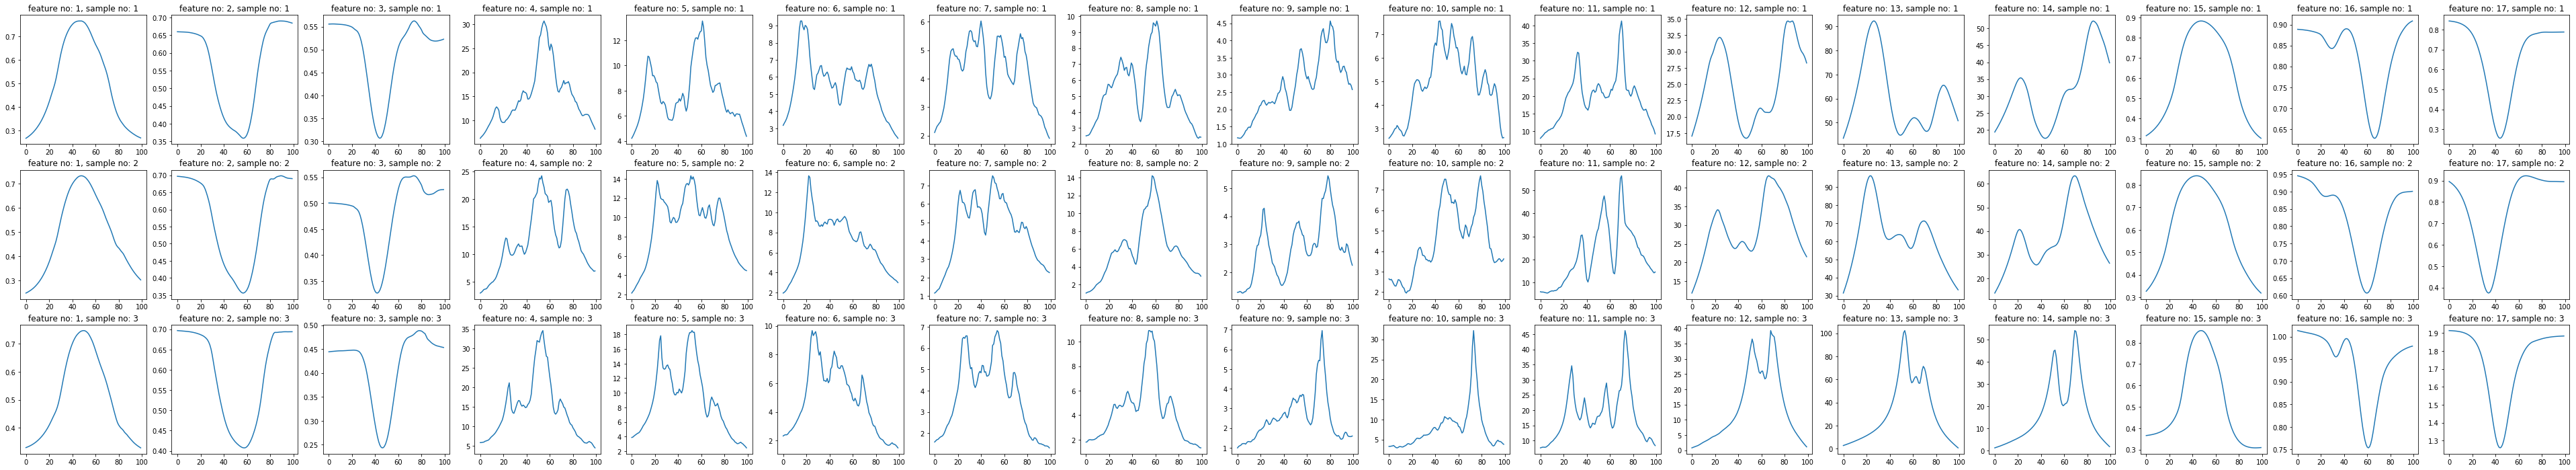

In [11]:
features=17
samples=3
movement_num=1

trainX_movement=np.array([trainX[i] for i in range(len(trainX)) if trainy[i][movement_num]==1])

m=features
n=samples
fig=plt.figure(figsize=(4*m,4*n))
k=0
for i in range(1,n+1):
    for j in range(1,m+1):
        k=k+1
        fig.add_subplot(n,m,k)
        plt.plot(trainX_movement[i-1,:,j-1])
        plt.title('feature no: %d, sample no: %d'%(j,i))
plt.show()